# INDEPENDENT PROJECT: CUSTOMER BEHAVIOUR ANALYSIS

## Problem Definition

### a) Specifying the Data Analytic Question

Perform analysis on data from Kira Plastinina, a Russian chain of retail stores, to help inform the team in formulating the marketing and sales strategies of the brand. 

### b) Defining the Metric for Success

Attain a percentage accuracy that is above 80. This would be an optimum accuracy considering the data is not from a very sensitive field.

### c) Understanding the context

Kira Plastinina, is a Russian brand that is sold through a defunct chain of retail stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines, and Armenia. The brand’s Sales and Marketing team would like to understand their customer’s behavior from data that they have collected over the past year. More specifically, they would like to learn the characteristics of customer groups

### d) Experimental design Taken

True Exprimental Design

1. Problem Definition
2. Data Sourcing
3. Check the Data
4. Perform Data Cleaning
5. Perform Exploratory Data Analysis  (Univariate, Bivariate & Multivariate)
6. Implement the Solution

## Libraries

In [15]:
library(repr)

library(readr)

library(dplyr)

library(corrplot)

library(DataExplorer)

library(xgboost)

library(tidyr)

library(stringr)

library(rpart)

library(ggplot2)

library(rpart.plot)

library(cowplot)

library(caret)

library(doParallel)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

corrplot 0.84 loaded

Attaching package: 'xgboost'

The following object is masked from 'package:dplyr':

    slice


********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************

Loading required package: lattice
Loading required package: foreach
Loading required package: iterators
Loading required package: parallel


## Reading the Data

In [16]:
# READING THE DATA

df <- read.csv("C:\\Users\\ned\\Documents\\TED\\my research data\\data sets\\online_shoppers_intention.csv")

## Checking the Data

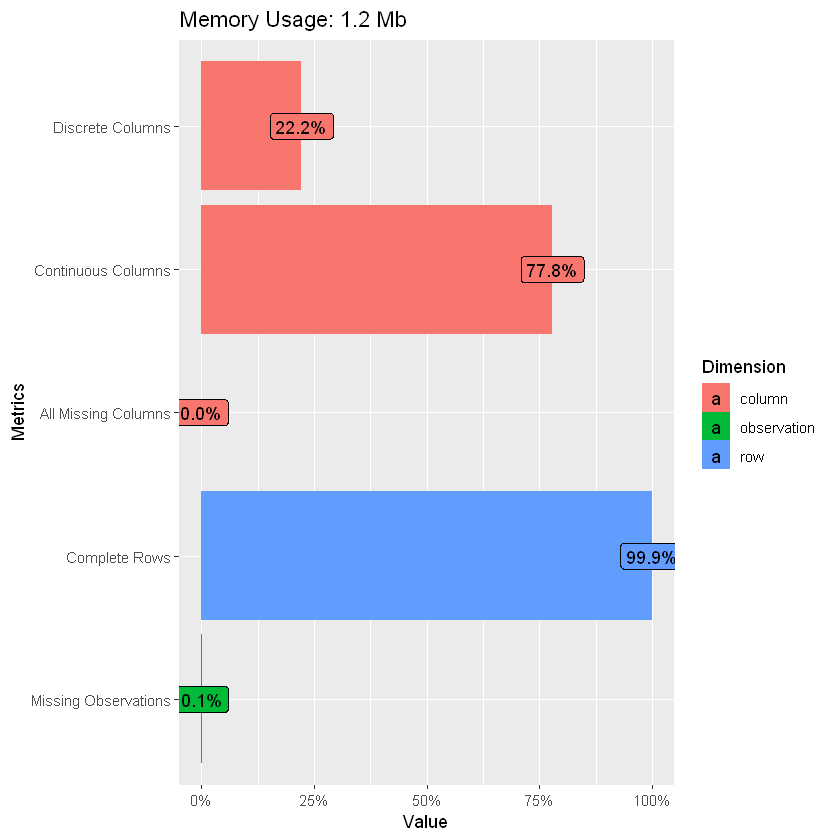

In [17]:
# DATA INTRO

plot_intro(df)

#### TOP ROWS

In [18]:
# PREVIEWING TOP OF THE DATA

head(df)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


#### BOTTOM ROWS

In [19]:
# PREVIEWING BOTTOM OF THE DATA

tail(df)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,0,0,1,0,16,503.000,0.000000000,0.03764706,0.00000,0,Nov,2,2,1,1,Returning_Visitor,FALSE,FALSE
12326,3,145,0,0,53,1783.792,0.007142857,0.02903061,12.24172,0,Dec,4,6,1,1,Returning_Visitor,TRUE,FALSE
12327,0,0,0,0,5,465.750,0.000000000,0.02133333,0.00000,0,Nov,3,2,1,8,Returning_Visitor,TRUE,FALSE
12328,0,0,0,0,6,184.250,0.083333333,0.08666667,0.00000,0,Nov,3,2,1,13,Returning_Visitor,TRUE,FALSE
12329,4,75,0,0,15,346.000,0.000000000,0.02105263,0.00000,0,Nov,2,2,3,11,Returning_Visitor,FALSE,FALSE
12330,0,0,0,0,3,21.250,0.000000000,0.06666667,0.00000,0,Nov,3,2,1,2,New_Visitor,TRUE,FALSE


#### UNIQUE VALUES

In [20]:
# NUMBER OF UNIQUE VALUES IN THE DATA

sapply(df, function(x) length(unique(x)))

Administrative Administrative_Duration           Informational 
                     28                    3337                      18 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                   1260                     312                    9553 
            BounceRates               ExitRates              PageValues 
                   1873                    4778                    2704 
             SpecialDay                   Month        OperatingSystems 
                      6                      10                       8 
                Browser                  Region             TrafficType 
                     13                       9                      20 
            VisitorType                 Weekend                 Revenue 
                      3                       2                       2

#### DATA SIZE

In [21]:
glimpse(df)

Observations: 12,330
Variables: 18
$ Administrative          <int> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0...
$ Administrative_Duration <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0...
$ Informational           <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ Informational_Duration  <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0...
$ ProductRelated          <int> 1, 2, 1, 2, 10, 19, 1, 1, 2, 3, 3, 16, 7, 6...
$ ProductRelated_Duration <dbl> 0.000000, 64.000000, -1.000000, 2.666667, 6...
$ BounceRates             <dbl> 0.200000000, 0.000000000, 0.200000000, 0.05...
$ ExitRates               <dbl> 0.200000000, 0.100000000, 0.200000000, 0.14...
$ PageValues              <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ SpecialDay              <dbl> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.8...
$ Month                   <fct> Feb, Feb, Feb, Feb, Feb, Feb, Feb, Feb, Feb...
$ OperatingSystems        <int> 1, 2, 4, 3, 3, 2, 2, 1, 2, 2, 1, 1, 1, 2, 3...
$ Browser        

#### VARIABLE TYPES

In [23]:
#Checking the data type of each column
sapply(df, class)

Administrative Administrative_Duration           Informational 
              "integer"               "numeric"               "integer" 
 Informational_Duration          ProductRelated ProductRelated_Duration 
              "numeric"               "integer"               "numeric" 
            BounceRates               ExitRates              PageValues 
              "numeric"               "numeric"               "numeric" 
             SpecialDay                   Month        OperatingSystems 
              "numeric"                "factor"               "integer" 
                Browser                  Region             TrafficType 
              "integer"               "integer"               "integer" 
            VisitorType                 Weekend                 Revenue 
               "factor"               "logical"               "logical"

#### FEATURE DENSITY

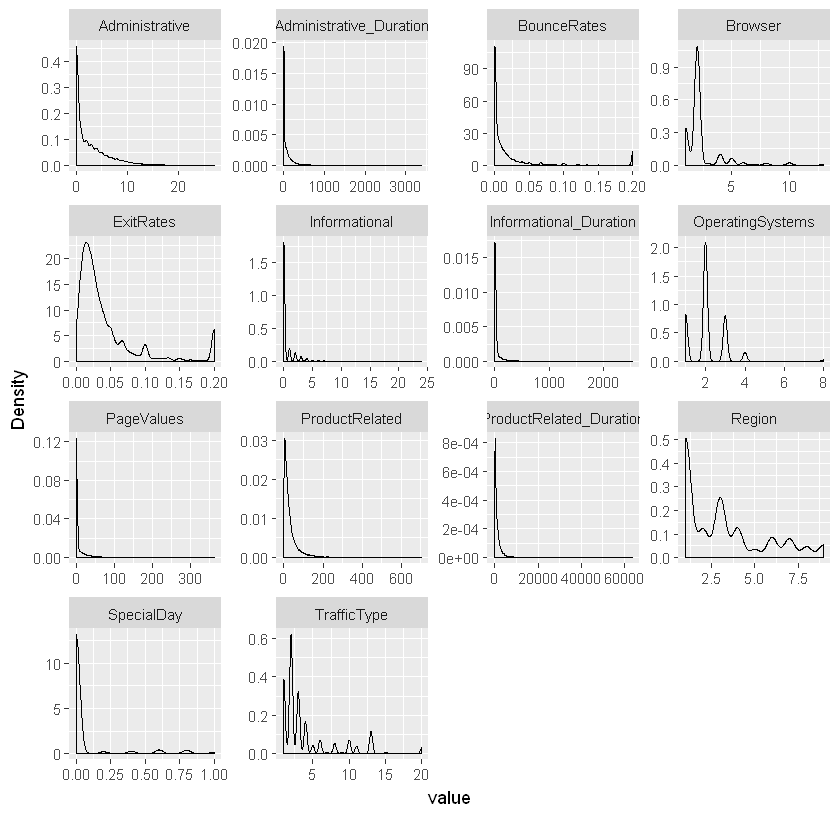

In [24]:
plot_density(df)

#### FEATURE REPORT

In [25]:
create_report(df)



processing file: report.rmd


  |..                                                               |   2%
   inline R code fragments

  |...                                                              |   5%
label: global_options (with options) 
List of 1
 $ include: logi FALSE

  |.....                                                            |   7%
  ordinary text without R code

  |......                                                           |  10%
label: introduce
  |........                                                         |  12%
  ordinary text without R code

  |.........                                                        |  14%
label: plot_intro
  |...........                                                      |  17%
  ordinary text without R code

  |............                                                     |  19%
label: data_structure
  |..............                                                   |  21%
  ordinary text without R code

  |...............                      

output file: C:/Users/ned/Documents/TED/my research data/R Programming Language/report.knit.md



"C:/Users/ned/ANACON~1/Scripts/pandoc" +RTS -K512m -RTS "C:/Users/ned/Documents/TED/my research data/R Programming Language/report.utf8.md" --to html4 --from markdown+autolink_bare_uris+tex_math_single_backslash+smart --output pandoc2bdc581f1a00.html --email-obfuscation none --self-contained --standalone --section-divs --table-of-contents --toc-depth 6 --template "C:\Users\ned\Documents\R\win-library\3.6\rmarkdown\rmd\h\default.html" --no-highlight --variable highlightjs=1 --variable "theme:yeti" --include-in-header "C:\Users\ned\AppData\Local\Temp\RtmpqSH2fu\rmarkdown-str2bdc2e7f1537.html" --mathjax --variable "mathjax-url:https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML" --lua-filter "C:/Users/ned/Documents/R/win-library/3.6/rmarkdown/rmd/lua/pagebreak.lua" --lua-filter "C:/Users/ned/Documents/R/win-library/3.6/rmarkdown/rmd/lua/latex-div.lua" 



Output created: report.html


Report is generated at "C:/Users/ned/Documents/TED/my research data/R Programming Language/report.html".


## Data Cleaning

In [28]:
categorical_cols = select_if(df, is.factor)
numeric_cols = select_if(df, is.numeric)

#### OUTLIERS

In [26]:
# FUNCTION THAT ENABLES US TO DETERMINE OUTLIERS IN THE DATASET  

"outlier" <-
function (x, opposite = FALSE, logical = FALSE) 
{
    if (is.matrix(x)) 
        apply(x, 2, outlier, opposite = opposite, logical = logical)
    else if (is.data.frame(x)) 
        sapply(x, outlier, opposite = opposite, logical = logical)
    else {
	if (xor(((max(x,na.rm=TRUE) - mean(x,na.rm=TRUE)) < (mean(x,na.rm=TRUE) - min(x,na.rm=TRUE))),opposite)) 
		{
			if (!logical) min(x,na.rm=TRUE)
			else x == min(x,na.rm=TRUE)
		}
		else 
		{
			if (!logical) max(x,na.rm=TRUE)
			else x == max(x,na.rm=TRUE)
		}
	} 
}


In [30]:
# OUTLIERS IN OUR DATASET

outlier(numeric_cols)

Administrative Administrative_Duration           Informational 
                27.0000               3398.7500                 24.0000 
 Informational_Duration          ProductRelated ProductRelated_Duration 
              2549.3750                705.0000              63973.5222 
            BounceRates               ExitRates              PageValues 
                 0.2000                  0.2000                361.7637 
             SpecialDay        OperatingSystems                 Browser 
                 1.0000                  8.0000                 13.0000 
                 Region             TrafficType 
                 9.0000                 20.0000

#### ANOMALIES

#### MISSING VALUES

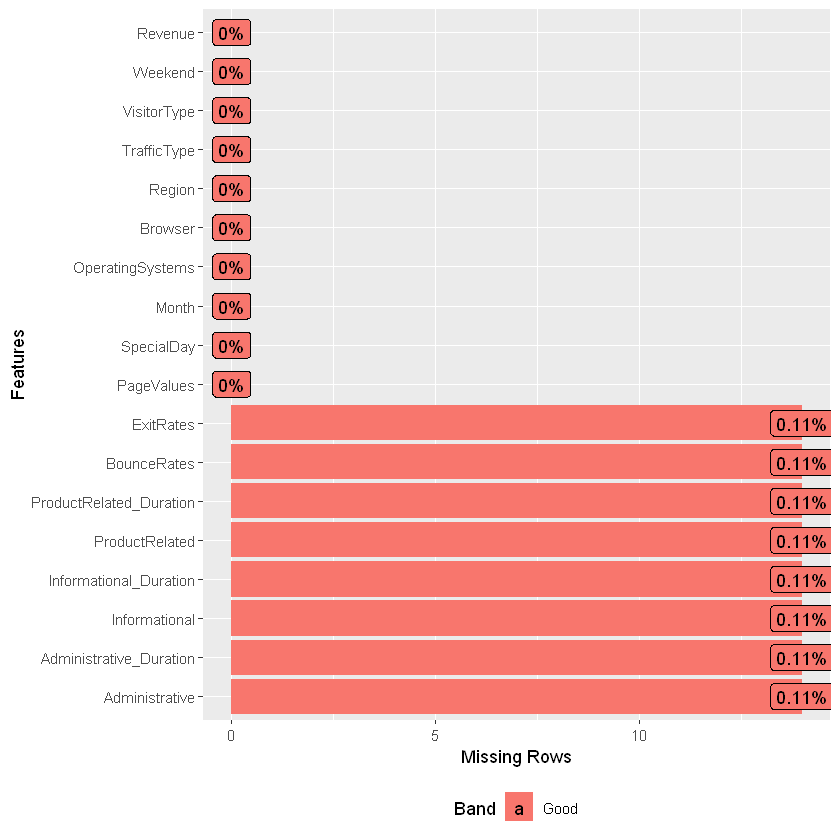

In [34]:
plot_missing(df)

## Exploratory Data Analysis

#### VARIABLE IMPORTANCE


Classification tree:
rpart(formula = Revenue ~ ., data = df, method = "class")

Variables actually used in tree construction:
[1] Administrative BounceRates    Month          PageValues    

Root node error: 1908/12330 = 0.15474

n= 12330 

        CP nsplit rel error  xerror     xstd
1 0.197065      0   1.00000 1.00000 0.021048
2 0.095388      1   0.80294 0.80975 0.019267
3 0.059224      2   0.70755 0.71226 0.018225
4 0.012579      3   0.64832 0.66300 0.017659
5 0.010000      5   0.62317 0.64990 0.017503
Call:
rpart(formula = Revenue ~ ., data = df, method = "class")
  n= 12330 

          CP nsplit rel error    xerror       xstd
1 0.19706499      0 1.0000000 1.0000000 0.02104771
2 0.09538784      1 0.8029350 0.8097484 0.01926701
3 0.05922432      2 0.7075472 0.7122642 0.01822523
4 0.01257862      3 0.6483229 0.6629979 0.01765879
5 0.01000000      5 0.6231656 0.6498952 0.01750317

Variable importance
             PageValues             BounceRates          Administrative 
           

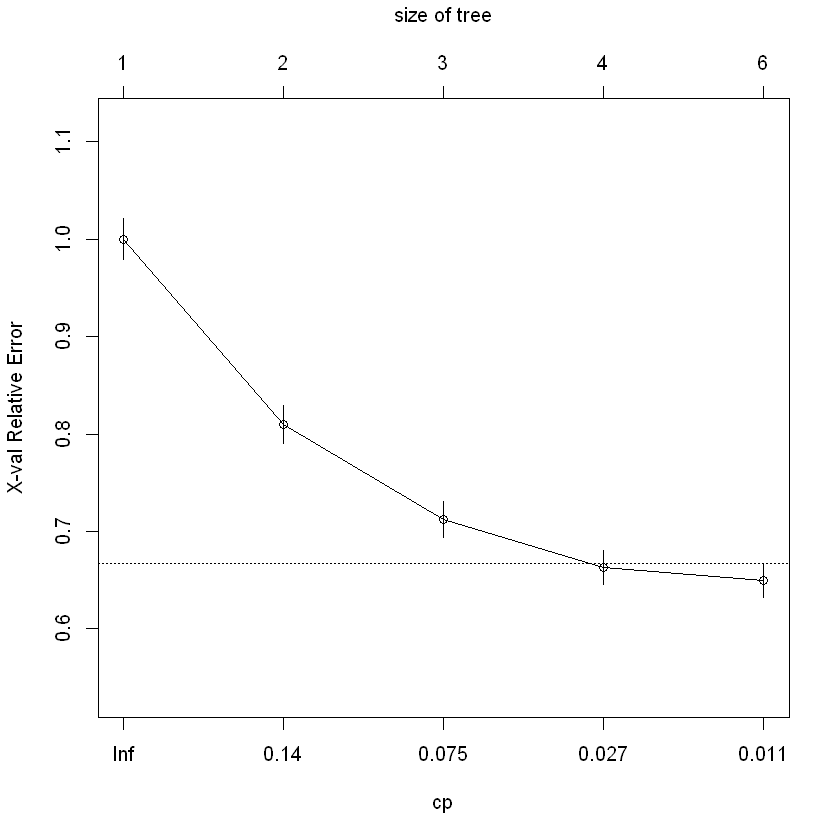

In [36]:
# DECISION TREE TO CHECK VARIABLE IMPORTANCE

talltree <- rpart( Revenue ~ . , data = df, method = "class")

# display the results
printcp(talltree)

plotcp(talltree)

summary(talltree)

#### DISTRIBUTION

In [37]:
colnames(df)

[1] "Administrative"          "Administrative_Duration"
 [3] "Informational"           "Informational_Duration" 
 [5] "ProductRelated"          "ProductRelated_Duration"
 [7] "BounceRates"             "ExitRates"              
 [9] "PageValues"              "SpecialDay"             
[11] "Month"                   "OperatingSystems"       
[13] "Browser"                 "Region"                 
[15] "TrafficType"             "VisitorType"            
[17] "Weekend"                 "Revenue"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 14 rows containing non-finite values (stat_bin)."`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 14 rows containing non-finite values (stat_bin)."`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 14 rows containing non-finite values (stat_bin)."`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 14 rows containing non-finite values (stat_bin)."

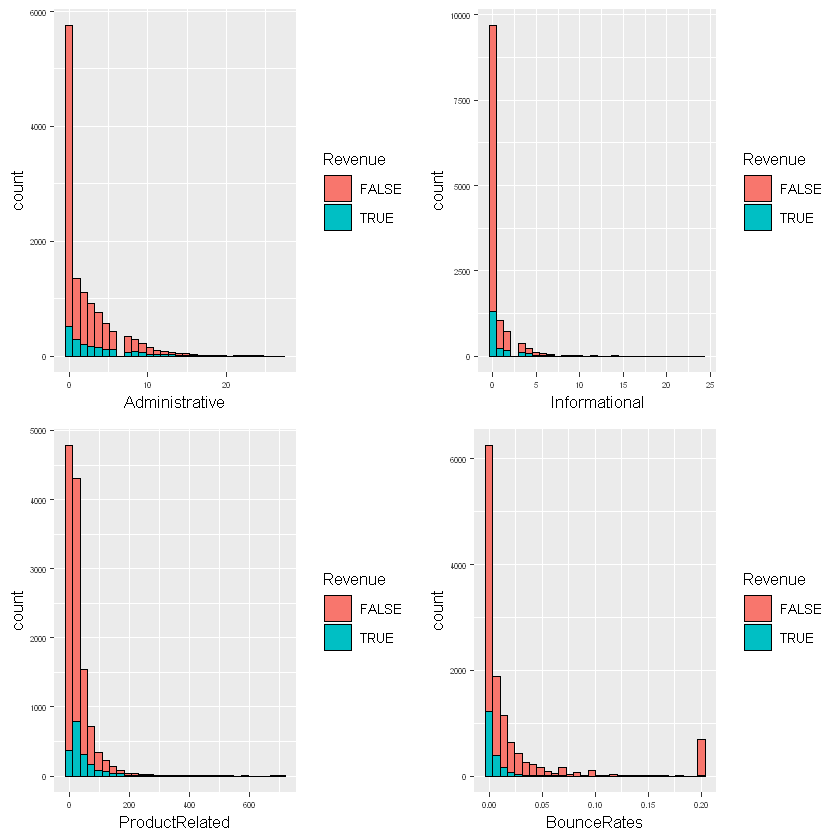

In [38]:
# VARIABLE DISTRIBUTION PLOTS

h1 <- ggplot(df, aes(x=Administrative, fill = Revenue)) + 
  geom_histogram(color="black")+
  theme(text = element_text(size=10) ,axis.text.x = element_text(size = 5),axis.text.y = element_text(size = 5))

h2 <- ggplot(df, aes(x=Informational, fill = Revenue)) + 
  geom_histogram(color="black")+
  theme(text = element_text(size=10) ,axis.text.x = element_text(size = 5),axis.text.y = element_text(size = 5))

h3 <- ggplot(df, aes(x=ProductRelated, fill = Revenue)) + 
  geom_histogram(color="black")+
  theme(text = element_text(size=10) ,axis.text.x = element_text(size = 5),axis.text.y = element_text(size = 5))

h4 <- ggplot(df, aes(x=BounceRates, fill = Revenue)) + 
  geom_histogram(color="black")+
  theme(text = element_text(size=10) ,axis.text.x = element_text(size = 5),axis.text.y = element_text(size = 5))

plot_grid(h1,h2,h3,h4)

In [ ]:
# INDEPENDENT VARIABLE VS TARGET

p1 <- ggplot(df, aes(x=Age, y=BounceRates, color=Clicked.on.Ad)) + geom_point(size=3)+
  theme(text = element_text(size=10) ,axis.text.x = element_text(size = 5),axis.text.y = element_text(size = 5))

p2 <- ggplot(df, aes(x=Daily.Time.Spent.on.Site, y=Daily.Internet.Usage, color=Clicked.on.Ad)) + geom_point(size=3)+
  theme(text = element_text(size=10) ,axis.text.x = element_text(size = 5),axis.text.y = element_text(size = 5))

p3 <- ggplot(df, aes(x=Age, y=Area.Income, color=Clicked.on.Ad)) + geom_point(size=3)+
  theme(text = element_text(size=10) ,axis.text.x = element_text(size = 5),axis.text.y = element_text(size = 5))

p4 <- ggplot(df, aes(x=Area.Income, y=Daily.Internet.Usage, color=Clicked.on.Ad)) + geom_point(size=3)+
  theme(text = element_text(size=10) ,axis.text.x = element_text(size = 5),axis.text.y = element_text(size = 5))



plot_grid(p1,p2,p3,p4)

Warning message:
"Removed 112 rows containing non-finite values (stat_boxplot)."

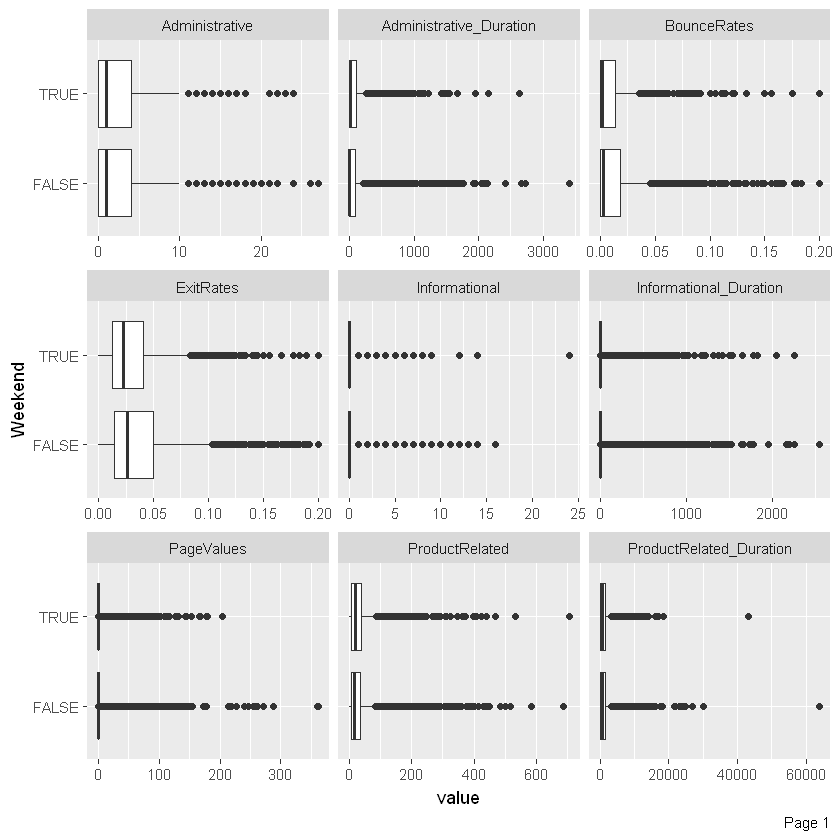

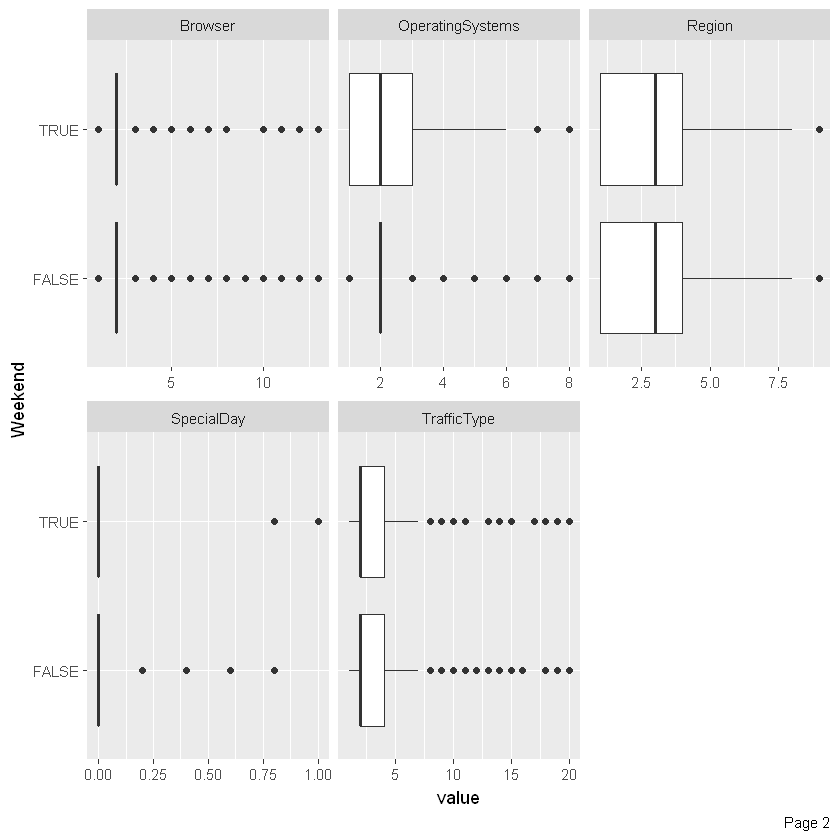

In [40]:
plot_boxplot(df, by= 'Weekend',  ncol = 3)

#### CORRELATION

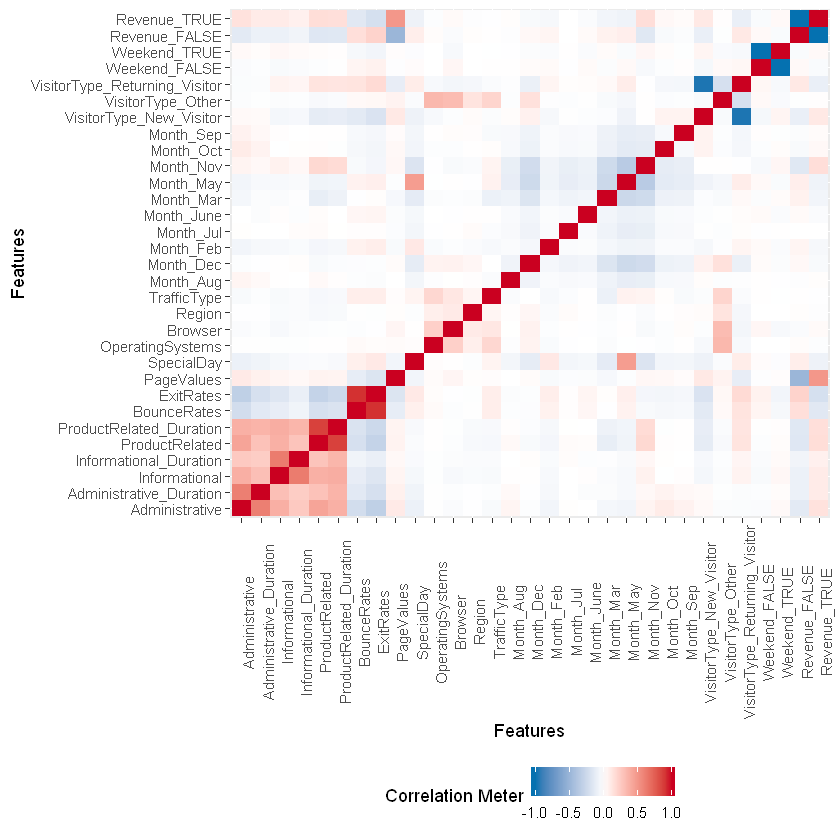

In [41]:
plot_correlation(df, cor_args = list( 'use' = 'complete.obs'))

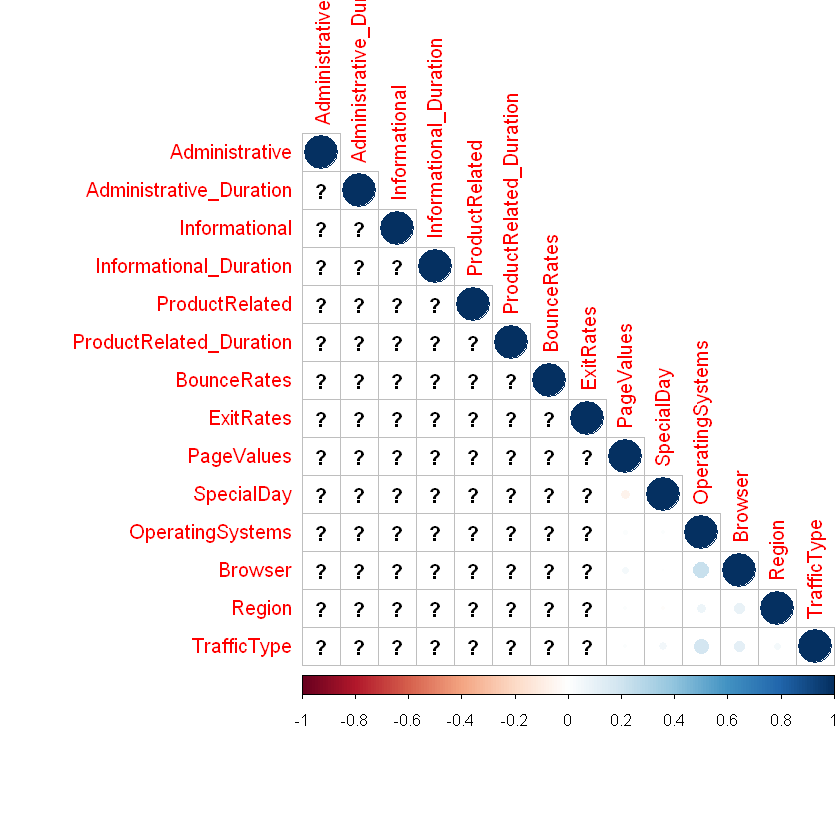

In [43]:
corr <- cor(numeric_cols)
corrplot(corr, type = 'lower')

#### TARGET FEATURE ANALYSIS

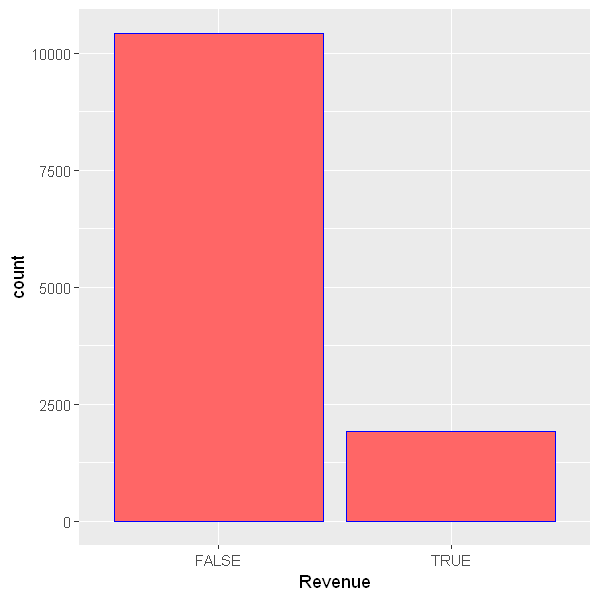

In [44]:
#PLOTTING THE TARGET FEATURE
options(repr.plot.width=5, repr.plot.height=5)

ggplot(df, aes(x = Revenue)) + geom_bar(color='blue',fill = "#FF6666")

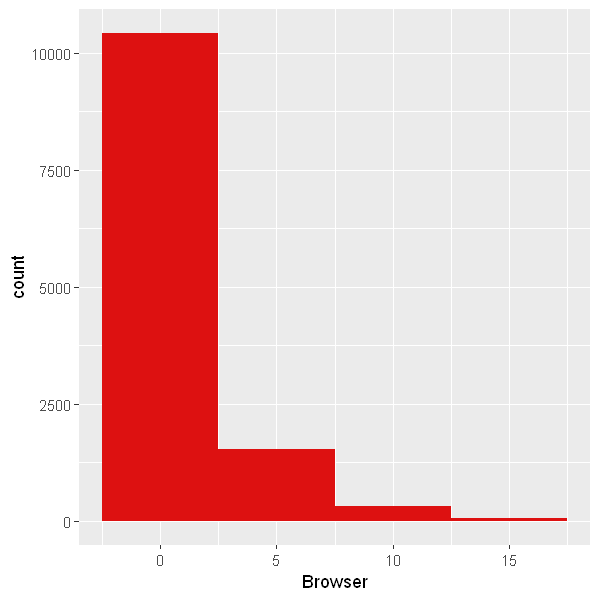

In [46]:
#PLOTTING THE TARGET FEATURE WITH THE NUMERIC FEATURES.
ggplot(df, aes(x = Browser )) + geom_histogram(binwidth = 5, fill = "#DD1111")+ scale_fill_hue(l=40, c=35)

In [ ]:
a = ggplot(df, aes(x=log(Daily.Internet.Usage),y=Area.Income)) + geom_point(color='blue')+ facet_wrap(~Clicked.on.Ad)

b = ggplot(df, aes(x=log(Daily.Time.Spent.on.Site),y=Age)) + geom_point(color='blue')+ facet_wrap(~Clicked.on.Ad)

c = ggplot(df, aes(x=log(Male),y=Area.Income)) + geom_point(color='blue')+ facet_wrap(~Clicked.on.Ad)

plot_grid(a,b,c)

In [ ]:
options(repr.plot.width=8, repr.plot.height=5)
library(VIM)
aggr_plot = aggr(df, col=c('navyblue','red'), numbers=TRUE, sortVars=TRUE,
                 labels=names(df), cex.axis=.7, gap=1,
                 ylab=c("Histogram of missing data","Pattern"))

## Modelling

#### I. Getting Dummies for Categorical columns

#### II. Splitting Data Target & Feature sets

## Challenge the Solution